<a href="https://colab.research.google.com/github/IsaaHack/IA/blob/main/P3_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático - Práctica 3 - Aprendizaje Profundo

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 9 de Junio de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>ISAAC BRAO AISSAONI</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, dos Notebooks de Colab (uno con cada ejercicio). No de debe entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- __El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.__

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'> En esta práctica se pretenden abordar algunos elementos básicos relativos al aprendizaje profundo utilizando Keras (https://keras.io/). Para ello, se emplean dos tareas del ámbito del procesado de imágenes y visión por computador: clasificación de imágenes (_image classification_) y eliminación de ruido en imágenes (_image denoising_). Para tener un conocimiento más profundo de algunas de estas tareas y métodos, así como familiarizarse con modelos más avanzados, se emplaza al estudiantado a cursar Visión por Computador (asignatura de 4º curso).

# <font color='blue'>Ejercicio 1: PROBLEMA DE CLASIFICACIÓN DE IMÁGENES USANDO REDES CONVOLUCIONALES PROFUNDAS Y COMPARACIÓN CON TÉCNICAS CLÁSICAS DE APRENDIZAJE AUTOMÁTICO (7 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación de imágenes. Más concretamente, se enfrentarán al problema de clasificación de imágenes denominado $\textit{MNIST}$ (https://en.wikipedia.org/wiki/MNIST_database), que incluye dígitos manuscritos. Como consecuencia, este conjunto de datos contiene información sobre 10 clases de imágenes (dígitos del $0$ al $9$).

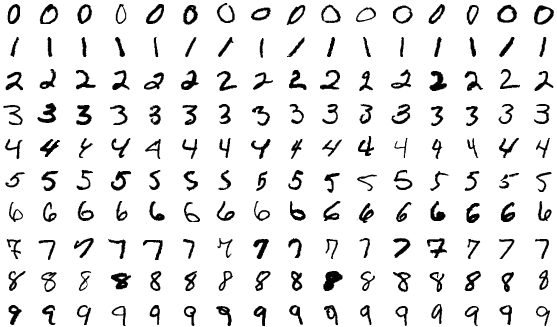



<font color='blue'> Este ejercicio consta de tres apartados:


1.   Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5.
2.   Implementación y experimentación con características HOG y SVMs. Comparación de los resultados proporcionados por esta aproximación clásica con los proporcionados por aprendizaje profundo.
3.   Implementación y experimentación con el modelo profundo que quieran implementar o emplear los estudiantes.



## <font color='blue'> Apartado 1. Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5 (3 puntos)

<font color='blue'> [LeNet5](https://en.wikipedia.org/wiki/LeNet) fue una de las primeras redes convolucionales, y se empleó exitosamente ya en los años 90 en la clasificación de dígitos manuscritos. Véase, por ejemplo, _LeCun et al. (1998). Gradient based learning applied to document recognition. Proceedings of the IEEE. 86(11): 2278-2324_.

<font color='blue'> En este ejercicio emplearemos una versión ligeramente modificada de la misma, que consta de las siguientes capas:

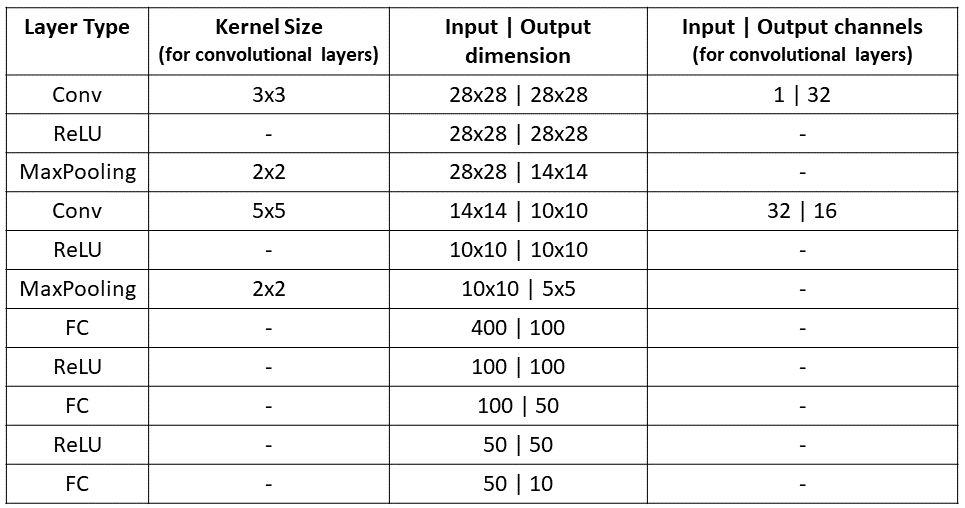

<font color='blue'> A continuación, el alumnado debe implementar en Keras esta arquitectura, y entrenarla y validarla con el conjunto de datos MNIST (ya disponible entre los conjuntos de datos por defecto en Keras: https://keras.io/api/datasets/). A la hora de entrenar modelos profundos es importante acordarse de configurar el cuaderno de modo que se ejecute en GPU (`Editar - Configuración del Cuaderno - Acelerador por Hardware`). De lo contrario, los entrenamientos serán innecesariamente lentos.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Establecer la semilla que vamos a utilizar
np.random.seed(42)

from tensorflow import keras

#import keras
!pip install np_utils
from keras.utils import to_categorical
from keras.datasets import mnist
keras.utils.set_random_seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

# NÚMERO DE CLASES
num_classes = 10

# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = 28, 28

# CARGAMOS LOS DATOS DE ENTRENAMIENTO Y TEST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=104e2fb30cb642194ffc3da73ff9f253fc557963eb754567e787fe8e929c9d5e
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


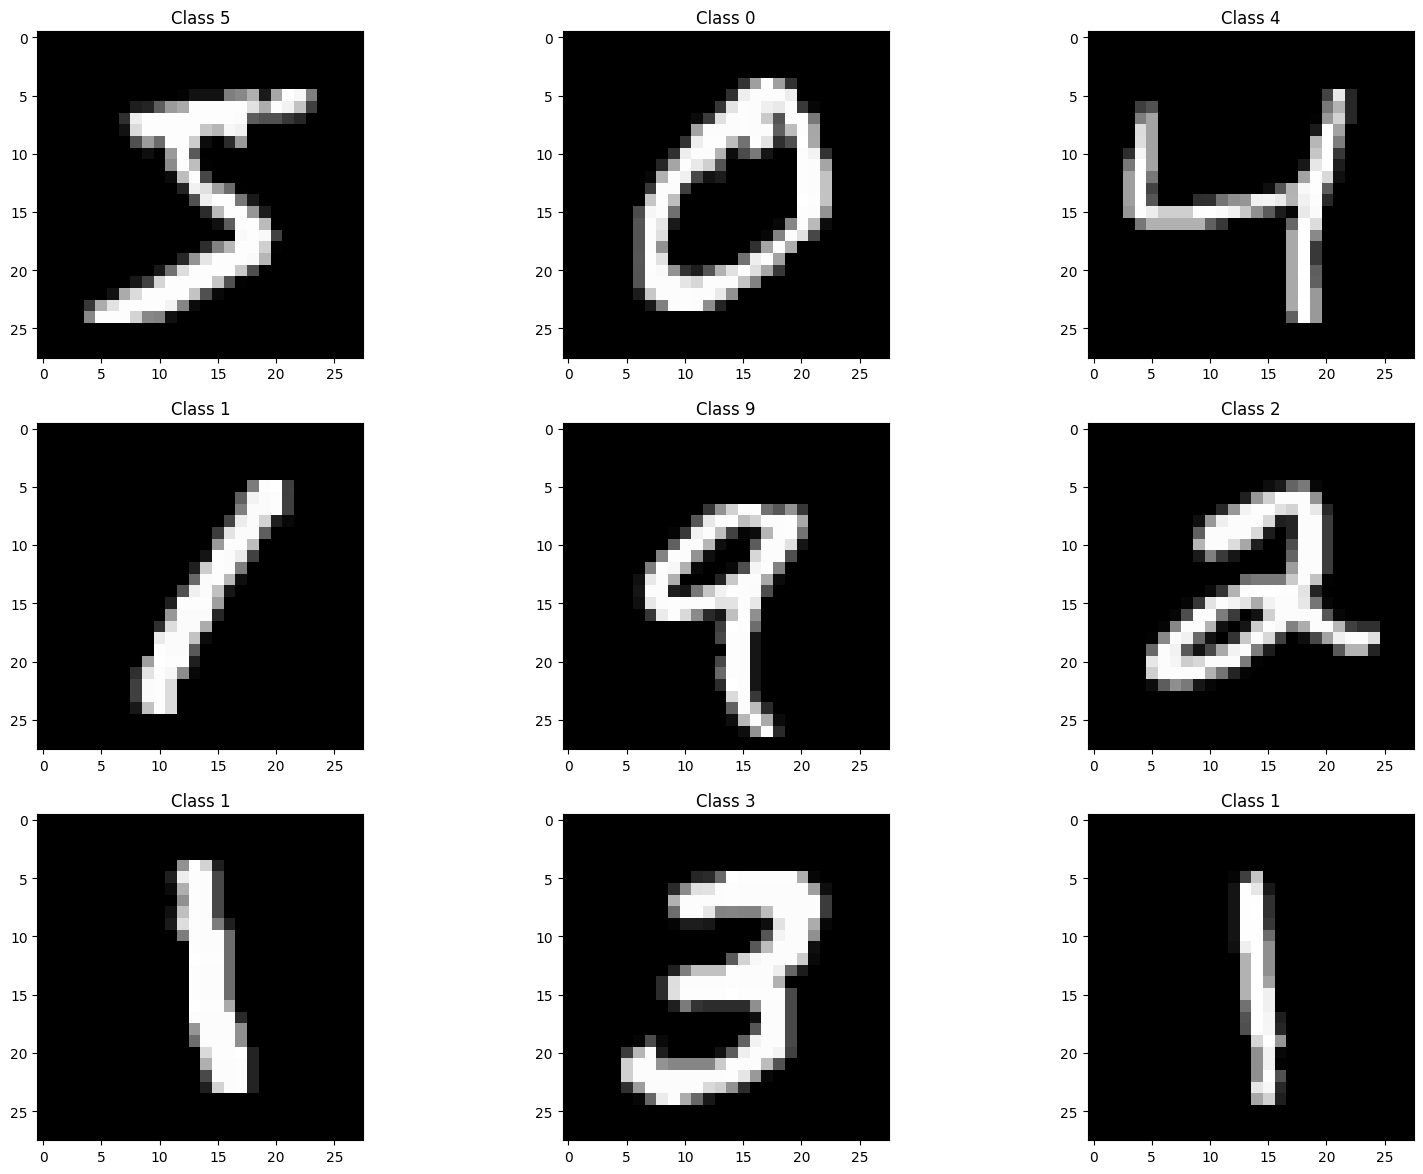

In [ ]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = plt.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)

plt.show()

<font color='blue'> El alumnado debe escoger empíricamente el tamaño de _batch_, el número de épocas y el _learning rate_. Se debe documentar en detalle todo el proceso de entrenamiento y selección de hiperparámetros (incluyendo qué metricas y función de pérdida se emplean y por qué). Se debe emplear _early stopping_ (https://keras.io/api/callbacks/early_stopping/), y los alumnos deben explicar en qué consiste este proceso de regularización. Se puede emplear tanto _hold-out_ como _cross-validation_ como protocolo de validación experimental pero, en cualquier caso, se deben explicar y justificar adecuadamente todas las decisiones tomadas. Se debe dejar un $20\%$ de los datos de entrenamiento para validación. Finalmente, se debe comparar el rendimiento obtenido con dos optimizadores: AdamW y Adadelta.

<font color='blue'> Resulta fundamental realizar un _.summary()_ del modelo creado y demostrar que se comprenden los distintos elementos que allí aparecen: nombre/tipo de capa, dimensiones de salida, y número de parámetros de la red.

In [ ]:
# Esta función pinta dos gráficas, una con la evolución
# de la función de pérdida en el conjunto de train y
# en el de validación, y otra con la evolución de la
# accuracy en el conjunto de train y el de validación.
# Es necesario pasarle como parámetro el historial del
# entrenamiento del modelo (lo que devuelve la
# función fit()).
def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy','Validation accuracy'])
    plt.show()


In [ ]:
# Esta función devuelve la accuracy de un modelo,
# definida como el porcentaje de etiquetas bien predichas
# frente al total de etiquetas. Como parámetros es
# necesario pasarle el vector de etiquetas verdaderas
# y el vector de etiquetas predichas, en el formato de
# keras (matrices donde cada etiqueta ocupa una fila,
# con un 1 en la posición de la clase a la que pertenece y un 0 en las demás).
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy


In [ ]:
#A CUBRIR POR EL ALUMNADO
from keras.layers import Flatten

def crearModelo():
    model = Sequential()

    # Primera capa convolucional + ReLU + MaxPooling
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Segunda capa convolucional + ReLU + MaxPooling
    model.add(Conv2D(16, kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Aplanar las características
    model.add(Flatten())

    # Primera capa totalmente conectada + ReLU
    model.add(Dense(400, activation='relu'))

    # Segunda capa totalmente conectada + ReLU
    model.add(Dense(100, activation='relu'))

    # Tercera capa totalmente conectada + ReLU
    model.add(Dense(50, activation='relu'))

    # Capa de salida
    model.add(Dense(10, activation='softmax'))

    return model

En el modelo he tenido que poner como padding "same" para que la convolución no perdiera dimensionalidad, por la naturaleza de las convoluciones. De esta forma se rellenan los bordes de la imagen con ceros para que se pueda mantener la dimensión de entrada.

Después hago un split de train, para tener un 20% del tamaño del train para validación. Lo hago de esta forma para que no se elijan el último 20% del conjunto de train, que es lo que hace por defecto el método fit de las redes de Keras.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de entrenamiento en dos:
# uno para entrenar el modelo y otro para validarlo.
x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Para compilar el modelo en el que uso adaDelta uso como learning rate 1.0 porque es el valor recomendado por la literatura, además de es el que mejor resultados me ha dado.

In [ ]:
modelo_adamDelta = crearModelo()

# Compilamos el modelo
modelo_adamDelta.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate=1.0),
              metrics=['accuracy'])

Imprimo el summary de la CNN. Tanto el modelo con adaDelta como con AdamW tienen el mismo summary.

In [ ]:
modelo_adamDelta.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        12816     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 400)              

En el early stopper he puesto como paciencia 5 porque es un valor recomendado por la literatura. He encontrado que más o menos ese valor tiene que estar entre 3 y 10 épocas. Tambíen he puesto que se restauren los mejores pesos encontrados hasta el momento según la pérdida de validación.

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

Para el entrenamiento, hago 100 épocas pero lo he puesto sabiendo que no iba a llegar a ese punto debido al early stopper.

Con el batch size he comprobado que a mayor batch menores tiempos en cada época, pero se converje más lentamente, lo contrario pasa si lo reduces. He elegido como valor de batch size 64 porque con ese valor más o menos se equilibra el aprendizaje.

In [ ]:
history_adamDelta = modelo_adamDelta.fit(x_tra, y_tra,
            epochs=100,
            verbose=1,
            batch_size=64,
            validation_data=(x_val, y_val),
            callbacks=[early_stopping])

Epoch 1/100
750/750 [==============================] - 10s 9ms/step - loss: 0.2156 - accuracy: 0.9305 - val_loss: 0.0889 - val_accuracy: 0.9731
Epoch 2/100
750/750 [==============================] - 8s 11ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0418 - val_accuracy: 0.9882
Epoch 3/100
750/750 [==============================] - 9s 12ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0377 - val_accuracy: 0.9882
Epoch 4/100
750/750 [==============================] - 7s 10ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0348 - val_accuracy: 0.9900
Epoch 5/100
750/750 [==============================] - 6s 8ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0457 - val_accuracy: 0.9893
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0365 - val_accuracy: 0.9910
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0395 - val_accuracy: 0.

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

He usado los mismos valores que en AdaDelta excepto el learning rate y weight decay. He puesto valores recomendados por la literatura y ha ido bien en el entrenamiento.

Como función de pérdida he usado el categorical croosentropy porque es el recomendado en problemas de clasificación.

In [ ]:
modelo_adamW = crearModelo()

# Compilamos el modelo
modelo_adamW.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01),
              metrics=['accuracy'])

In [ ]:
history_adamW = modelo_adamW.fit(x_tra, y_tra,
            epochs=100,
            verbose=1,
            batch_size=64,
            validation_data=(x_val, y_val),
            callbacks=[early_stopping])

Epoch 1/100
750/750 [==============================] - 6s 6ms/step - loss: 0.1932 - accuracy: 0.9414 - val_loss: 0.0681 - val_accuracy: 0.9794
Epoch 2/100
750/750 [==============================] - 5s 7ms/step - loss: 0.0593 - accuracy: 0.9812 - val_loss: 0.0487 - val_accuracy: 0.9861
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0524 - val_accuracy: 0.9845
Epoch 5/100
750/750 [==============================] - 5s 7ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0425 - val_accuracy: 0.9893
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0370 - val_accuracy: 0.9907
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0170 - accuracy: 0.9942 - val_loss: 0.0515 - val_accuracy: 0.9883

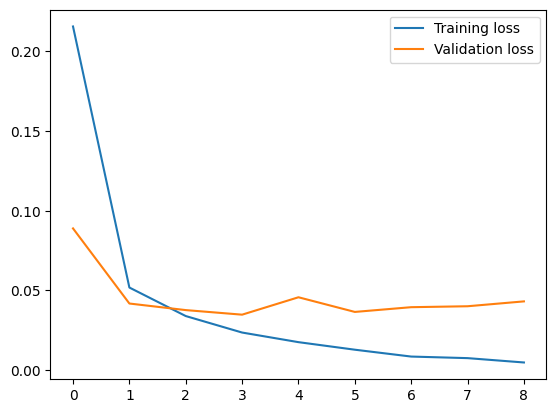

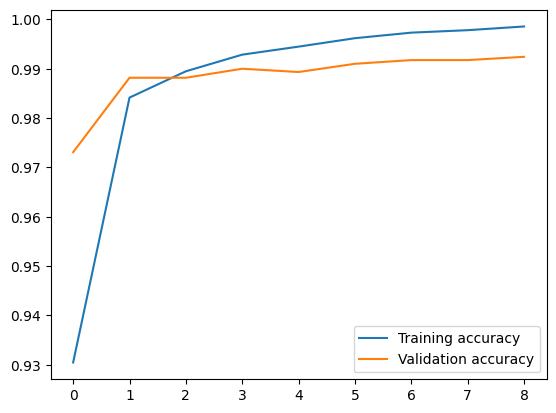

In [ ]:
mostrarEvolucion(history_adamDelta)

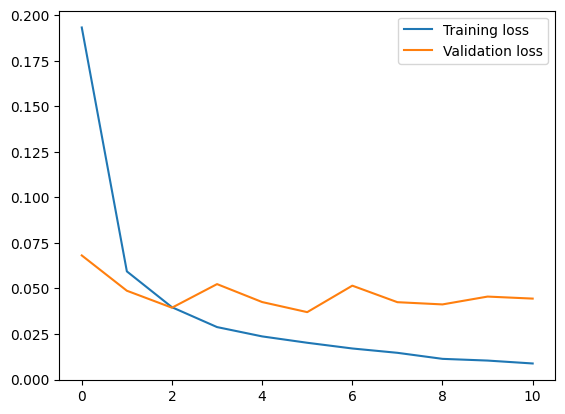

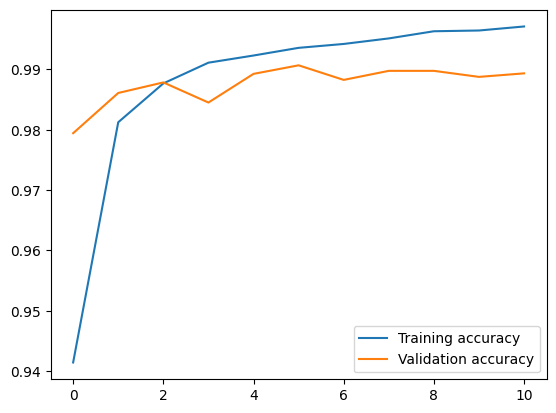

In [ ]:
mostrarEvolucion(history_adamW)

Las gráficas de AdaDelta y AdamW son muy similares. Se observa como al principio el loss y accuracy son mejores en validacion, creo que debido las diferencias de tamaño en ambos conjuntos, pero después train mejora a validación.

Gracias al early stopper hemos evitado un overfitting.

313/313 [==============================] - 1s 2ms/step


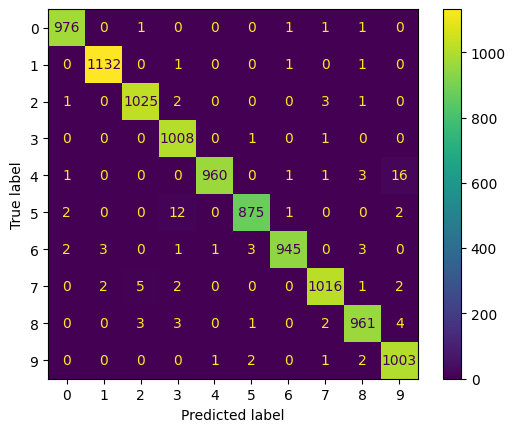

Evaluación del modelo:
313/313 [==============================] - 1s 2ms/step
99.01%


In [ ]:
# Hacemos una matriz de confusión para ver cómo se comporta el modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtenemos las predicciones del modelo
preds = modelo_adamDelta.predict(x_test)
preds = np.argmax(preds, axis=1)

# Obtenemos las etiquetas verdaderas
labels = np.argmax(y_test, axis=1)

# Creamos la matriz de confusión
cm = confusion_matrix(labels, preds)

# La mostramos
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.show()

# Evaluamos el modelo con el conjunto de test
print('Evaluación del modelo:')
print(f'{calcularAccuracy(y_test, modelo_adamDelta.predict(x_test))*100:.2f}%')

313/313 [==============================] - 1s 2ms/step


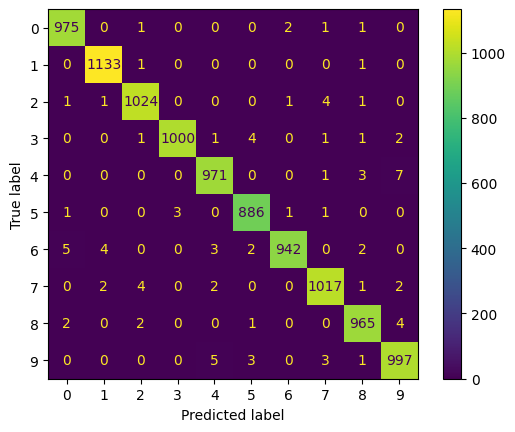

Evaluación del modelo:
313/313 [==============================] - 1s 2ms/step
99.10%


In [ ]:
# Hacemos una matriz de confusión para ver cómo se comporta el modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtenemos las predicciones del modelo
preds = modelo_adamW.predict(x_test)
preds = np.argmax(preds, axis=1)

# Obtenemos las etiquetas verdaderas
labels = np.argmax(y_test, axis=1)

# Creamos la matriz de confusión
cm = confusion_matrix(labels, preds)

# La mostramos
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.show()

# Evaluamos el modelo con el conjunto de test
print('Evaluación del modelo:')
print(f'{calcularAccuracy(y_test, modelo_adamW.predict(x_test))*100:.2f}%')

Analizando las matrices de confusión, se puede observar como el modelo con AdaDelta confunde en algunas imagenes entre 3 y 5, y 4 y 9. Se puede entender debido a que son números que son de formas similares. En AdamW no se aprecia que falle tanto en esos valores pero si que se confunde entre el 4 y 9 un poco más que en el resto.

Con respecto a acierto son muy similares y estan saturando el rendimiento de MNIST. AdaDelta es un poco mejor en train, mientras que AdamW es mejor en test, puede ser que el modelo con AdamW haya generalizado mejor. También se ve como la red sobreaprende los datos de train, esto se podría mejorar añadiendo capas Dropout.

## <font color='blue'> Apartado 2. Implementación y experimentación con técnicas clásicas (características HOG y SVMs) (2 puntos)

<font color='blue'> Ahora vamos a emplear SVM y características de HOG para clasificar estas imágenes. Se debe describir todo el proceso de ajuste realizado, incluyendo la selección de hiperparámetros, y se deben discutir las ventajas y desventajas de esta aproximación en comparación con el uso de _deep learning_, así como los resultados obtenidos y la calidad de las características empleadas.

In [ ]:
from skimage.feature import hog

fd = hog(x_train[0], orientations=4, pixels_per_cell=(10,10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

x_train_HOG = np.zeros((x_train.shape[0],len(fd)), np.float32)
x_test_HOG = np.zeros((x_test.shape[0],len(fd)), np.float32)

for i in range(x_train.shape[0]):
  x_train_HOG[i] = hog(x_train[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)
for i in range(x_test.shape[0]):
  x_test_HOG[i] = hog(x_test[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

In [ ]:
print(x_train_HOG.shape)

(60000, 16)


Tenemos que tranformar las etiquetas para que el SVM reconozca bien las clases.

In [ ]:
# Transformamos las etiquetas a un vector
y_train_HOG = np.argmax(y_train, axis=1)
y_test_HOG = np.argmax(y_test, axis=1)

Visualizamos los histogramas de las carasteristicas que ha extraido el HOG.

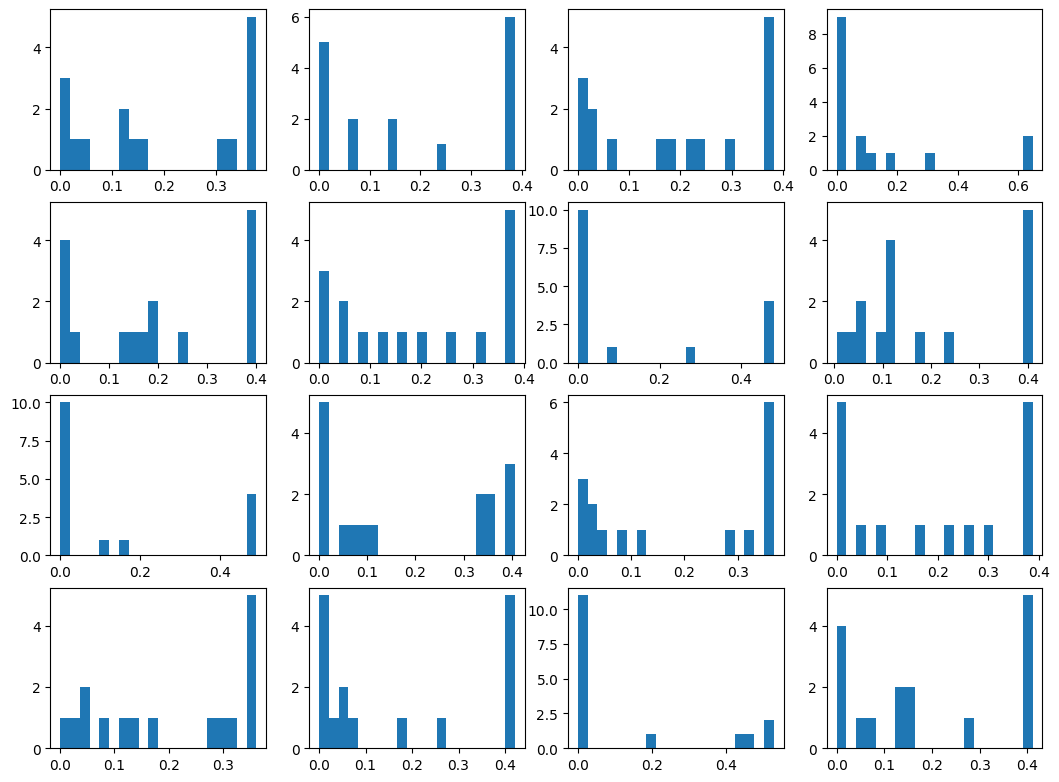

In [ ]:
# A CUBRIR POR EL ALUMNADO

# Ver los histogramas de las características HOG
fig = plt.figure()
for i in range(x_train_HOG.shape[1]):
  plt.subplot(4,4,i+1)
  plt.hist(x_train_HOG[i], bins=20)

fig.set_size_inches(np.array(fig.get_size_inches()) * 2)
plt.show()

Hago un EDA y preprocesamiento simple con IsolationForest para anomalías y reducir el tamaño del problema, StandardScaler para la normalización de los datos, PCA para reducir dimensionalidad para que el SVM tarde un tiempo razonable.

In [ ]:
# Quitamos outliers con Isolation Forest
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)
clf.fit(x_train_HOG)
outliers = clf.predict(x_train_HOG)

x_train_HOG = x_train_HOG[outliers == 1]
y_train_HOG = y_train_HOG[outliers == 1]

In [ ]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_HOG)
x_train_HOG = scaler.transform(x_train_HOG)
x_test_HOG = scaler.transform(x_test_HOG)

In [ ]:
from sklearn.decomposition import PCA

# Reducimos la dimensionalidad con PCA
pca = PCA(n_components=0.95)
pca.fit(x_train_HOG)
x_train_HOG = pca.transform(x_train_HOG)
x_test_HOG = pca.transform(x_test_HOG)

print(x_train_HOG.shape)

(54000, 13)


Hago un GridSearch sencillo para la búsqueda de hiperparámetros. No lo hago muy complejo para que el SVM no tarde tanto. Además hago un 5-Fold-Croos-Validatión para cada modelo.

In [ ]:
# Voy a hacer un grid search para encontrar los mejores hiperparámetros del SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos probar
param_grid = {'C': [1, 10],
              'gamma': [0.1, 0.01],
              'kernel': ['rbf']}

# Creamos el modelo
svc = SVC()

# Creamos el objeto de Grid Search
grid = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Entrenamos el modelo
grid.fit(x_train_HOG, y_train_HOG)

# Mostramos los mejores hiperparámetros
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.8417592592592593


Obtenemos como mejores hiperparámetros {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}. El mejor modelo nos da un acierto del 84% que es bastante peor que la CNN.


In [ ]:
mejor_modelo = SVC(C=10, gamma=0.01, kernel='rbf')

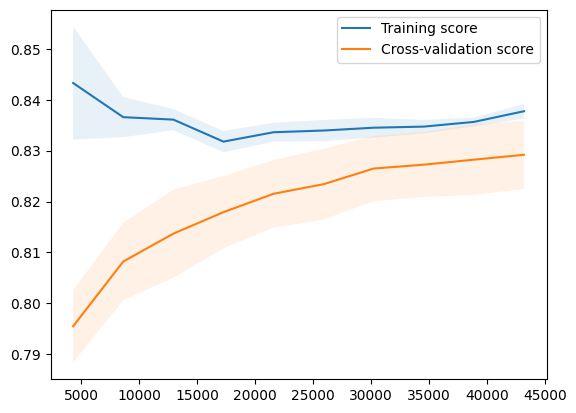

Evaluación del modelo:
84.44%


In [ ]:
from sklearn.model_selection import learning_curve

# Calculamos las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(mejor_modelo, x_train_HOG, y_train_HOG, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculamos la media y la desviación típica de los resultados
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Pintamos las curvas de aprendizaje
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
plt.legend()
plt.show()

# Evaluamos el modelo con el conjunto de test
print('Evaluación del modelo:')
print(f'{grid.score(x_test_HOG, y_test_HOG)*100:.2f}%')

En la curva de aprendizaje se puede observar que el rendimiento del SVM está saturado, por lo que con las características de HOG y un SVM no podemos a alcanzar muchos mejores resultados que este.

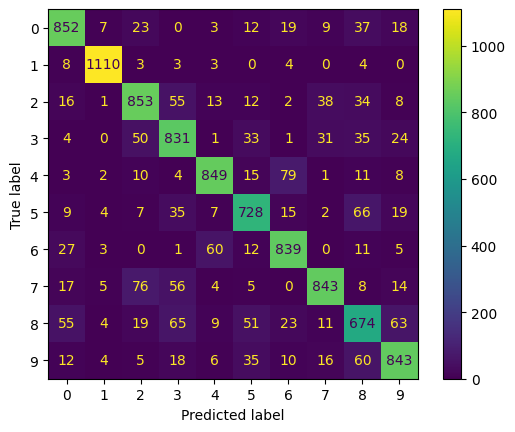

In [ ]:
# Hacer una matriz de confusión

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mejor_modelo.fit(x_train_HOG, y_train_HOG)

y_pred = mejor_modelo.predict(x_test_HOG)
cm = confusion_matrix(y_test_HOG, y_pred, labels=mejor_modelo.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mejor_modelo.classes_)
disp.plot()
plt.show()

En la matriz de confusión también se observa como el SVM se equivoca mucho más que una CNN.

## <font color='blue'> Apartado 3. Implementación y experimentación con uno o más modelos escogidos o diseñados por los estudiantes (2 puntos)

<font color='blue'> En este apartado, los alumnos deben diseñar su propia red neuronal para intentar mejorar los resultados obtenidos hasta el momento. Por ejemplo, se puede incrementar la profundidad de la red, el número o tamaño de los filtros convolucionales a aprender, se puede optar por emplear técnicas de regularización como Dropout o Batch Normalization, estrategias de _data augmentation_ o inicialización de pesos, etc. Queda a su elección la estrategia a seguir aunque, en cualquier caso, se valorará la complejidad de la propuesta realizada así como la calidad de la documentación aportada.

<font color='blue'> Del mismo modo, los estudiantes también pueden incluir una comparativa con el rendimiento de alguna otra técnica clásica de su elección (como Random Forest o Gradient Boosting) junto con vectores de características de su elección (incluyendo la modificación de los hiperparámetros del extractor de HOG usado en el apartado anterior, para lo cual será necesario que los alumnos revisen la documentación al respecto).

<font color='blue'> Dentro de este tercer apartado, en caso de que se haya saturado el rendimiento en MNIST (en el sentido de obtener una _accuracy_ en validación superior al $98\%$), se debe emplear como conjunto de datos $\textit{CIFAR-10}$ (https://archive.ics.uci.edu/dataset/691/cifar+10 y https://www.cs.toronto.edu/~kriz/cifar.html). Este conjunto de datos contiene información sobre 10 clases de imágenes diferentes, y también está incluido directamente en Keras (https://keras.io/api/datasets/):

```
# Cargar el conjunto de datos CIFAR-10
cifar10 = tf.keras.datasets.cifar10

# Dividir los datos en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases en CIFAR-10
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']
```

Debido que he saturado el rendimiento de MNIST, cargamos el conjunto de datos CIFAR-10

In [ ]:
# A CUBRIR POR EL ALUMNADO

# Cargar el conjunto de datos de CIFAR-10
from keras.datasets import cifar10

# Dividimos el conjunto en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases en CIFAR-10
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

170498071/170498071 [==============================] - 10s 0us/step


Preproceso los datos.

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Normalizamos los datos
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape)

(50000, 32, 32, 3)


Divido el conjunto de train en dos escogiendo un 20% para validación. También lo hago de manera estratificada para que las clases estén equilibradas en ambos conjuntos.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de entrenamiento en dos:
# uno para entrenar el modelo y otro para validarlo.
x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

Añado una capa para hacer data augmentation y poder mejorar los resultados de la CNN. He añadido pocas capas de data augmentation porque son costosas computacionalmente y hacen que el entrenamiento sea más lento.

In [ ]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip(),
        keras.layers.RandomContrast(factor=0.2),
    ]
)

He usado un modelo que usa suma residual porque he visto que bastantes modelos lo usan. Además de esto he añadido capas de batch normalization y dropout para intentar mejorar el rendimento.

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, Add
from keras.models import Model

def model_cifar():
    model = Model()

    # Imput layer
    input = Input(shape=(32, 32, 3))

    # Data augmentation
    x = data_augmentation(input)

    x = Conv2D(64, (1, 1), padding='same')(x)

    # Primera capa convolucional + ReLU + MaxPooling
    conv1 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(x)
    conv2 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv1)
    # Suma residual
    x = Add()([x, conv2])
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(128, (1, 1), padding='same')(x)

    # Segunda capa convolucional + ReLU + MaxPooling
    conv1 = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(x)
    conv2 = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu')(conv1)
    # Suma residual
    x = Add()([x, conv2])
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(256, (1, 1), padding='same')(x)

    # Tercera capa convolucional + ReLU + MaxPooling
    conv1 = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(x)
    conv2 = Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')(conv1)
    # Suma residual
    x = Add()([x, conv2])
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

    # Cuarta capa convolucional + ReLU + MaxPooling
    x = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

    # Aplanar las características
    x = Flatten()(x)

    # Primera capa totalmente conectada + ReLU
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Segunda capa totalmente conectada + ReLU
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Capa de salida
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)

    return model

In [ ]:
model = model_cifar()

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 sequential (Sequential)     (None, 32, 32, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 64)           256       ['sequential[0][0]']          
                                                                                                  
 conv2d_1 (Conv2D)           (None, 32, 32, 64)           36928     ['conv2d[0][0]']              
                                                                                            

Compilo el modelo con AdamW porque es un optimizador que en general funciona muy bien bajo cualquier circunstancia, debido a que ajusta internamente el lr.

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.AdamW(learning_rate=0.001),
                metrics=['accuracy'])

En esta ocasión la paciencia del early stopper la pongo en 10 para que el scheduler de lr sea capaz de ir reduciendo progresivamente el lr para una mejor convergencia del modelo.  

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=10e-5)

In [ ]:
H = model.fit(x_tra, y_tra,
            epochs=100,
            verbose=1,
            batch_size=64,
            validation_data=(x_val, y_val),
            callbacks=[early_stopping, reduce_lr])

Epoch 1/100
625/625 [==============================] - 36s 35ms/step - loss: 1.8492 - accuracy: 0.3446 - val_loss: 1.5287 - val_accuracy: 0.4452 - lr: 0.0010
Epoch 2/100
625/625 [==============================] - 22s 35ms/step - loss: 1.3704 - accuracy: 0.5012 - val_loss: 1.4161 - val_accuracy: 0.4931 - lr: 0.0010
Epoch 3/100
625/625 [==============================] - 22s 35ms/step - loss: 1.1467 - accuracy: 0.5896 - val_loss: 1.0893 - val_accuracy: 0.6184 - lr: 0.0010
Epoch 4/100
625/625 [==============================] - 22s 36ms/step - loss: 1.0138 - accuracy: 0.6373 - val_loss: 1.1470 - val_accuracy: 0.6072 - lr: 0.0010
Epoch 5/100
625/625 [==============================] - 22s 35ms/step - loss: 0.9216 - accuracy: 0.6722 - val_loss: 0.9744 - val_accuracy: 0.6612 - lr: 0.0010
Epoch 6/100
625/625 [==============================] - 20s 33ms/step - loss: 0.8476 - accuracy: 0.6986 - val_loss: 0.9674 - val_accuracy: 0.6630 - lr: 0.0010
Epoch 7/100
625/625 [==============================]

Exception ignored in: <function _xla_gc_callback at 0x7ba4310405e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


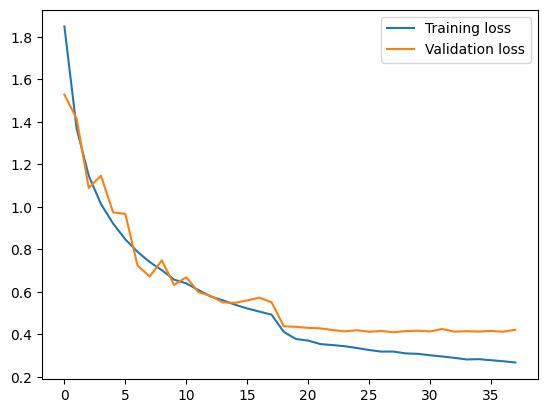

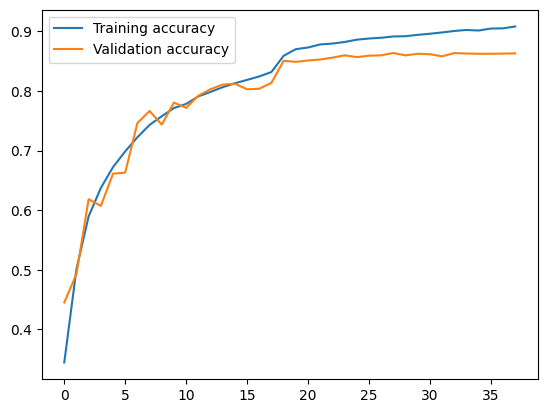

In [ ]:
# Mostramos la evolución de la función de pérdida y de la accuracy
mostrarEvolucion(H)

En el historial se observa cuando el scheduler de lr reduce el learning rate, y hace que el aprendizaje se estabilize.

313/313 [==============================] - 2s 5ms/step


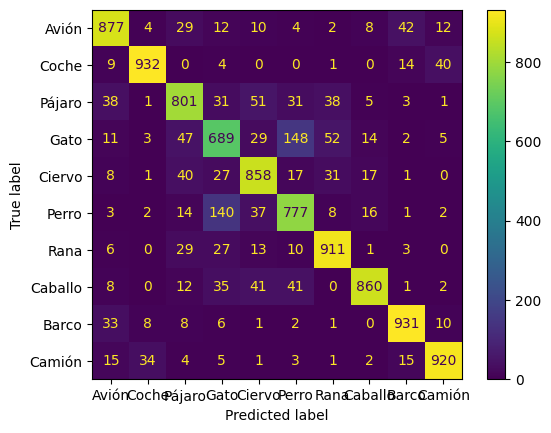

Evaluación del modelo:
313/313 [==============================] - 1s 5ms/step
85.56%


In [ ]:
# Hacemos una matriz de confusión para ver cómo se comporta el modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtenemos las predicciones del modelo
preds = model.predict(x_test)
preds = np.argmax(preds, axis=1)

# Obtenemos las etiquetas verdaderas
labels = np.argmax(y_test, axis=1)

# Creamos la matriz de confusión
cm = confusion_matrix(labels, preds)

# La mostramos
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

# Evaluamos el modelo con el conjunto de test
print('Evaluación del modelo:')
print(f'{calcularAccuracy(y_test, model.predict(x_test))*100:.2f}%')

El accuracy de test es muy similar al de validación, situandose en un 85-86%.

En la matriz de confusión se que la CNN confunde mucho entre perros y gatos, y en general entre animales. Los vehículos los suele diferenciar mejor.

# <font color='blue'>Ejercicio 2: PROBLEMA DE ELIMINACIÓN DE RUIDO EN IMÁGENES USANDO AUTOENCODERS (3 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán al problema de eliminar ruido en imágenes. Para ello, se empleará el conjunto de datos $\textit{Fashion MNIST}$ (https://keras.io/api/datasets/fashion_mnist/), que contiene imágenes con 10 clases de ropa. En concreto, lo que haremos ahora es entrenar un modelo de aprendizaje automático conocido como autoencoder (que presenta una estructura _encoder-decoder_ y permite aprender representaciones (_embeddings_/_encodings_) altamente eficientes de forma no supervisada). Los autoencoders se emplean frecuentemente en tareas de reducción de dimensionalidad o detección de anomalías, y en este caso lo emplearemos para eliminar ruido en imágenes.

<font color='blue'> Referencias recomendadas sobre autoencoders:

*   <font color='blue'> Capítulo 14 de Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
*   <font color='blue'> Hinton, G. E., & Salakhutdinov, R. R. (2006). Reducing the dimensionality of data with neural networks. Science, 313(5786), 504-507.

<font color='blue'> Se parte de la implementación proporcionada en la propia documentación de Keras (cuya revisión detallada se recomienda a los estudiantes). https://keras.io/examples/vision/autoencoder/



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import fashion_mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array,noise_factor):
    """Adds random noise to each image in the supplied array."""
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


4422102/4422102 [==============================] - 1s 0us/step


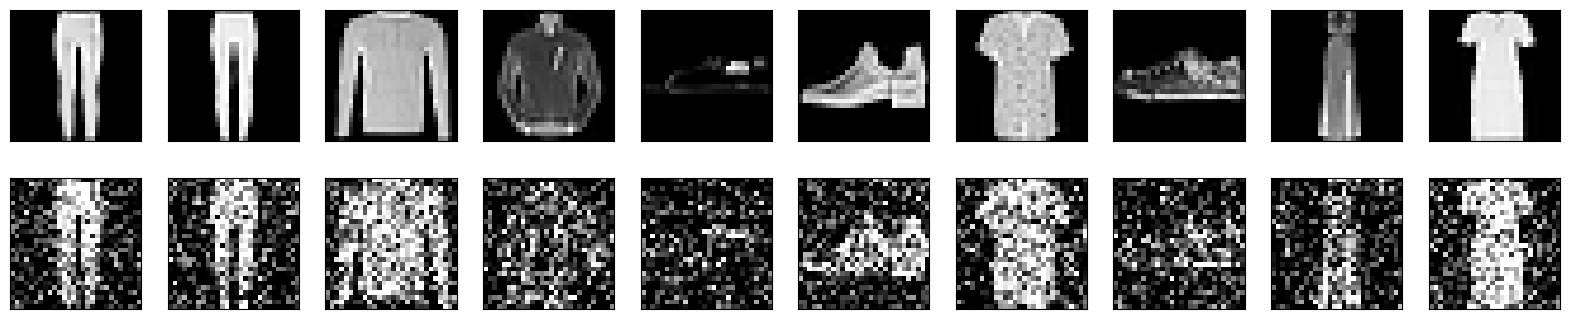

In [ ]:
(train_data, _), (test_data, _) = fashion_mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noise_factor = 0.4

noisy_train_data = noise(train_data,noise_factor)
noisy_test_data = noise(test_data,noise_factor)

display(train_data, noisy_train_data)

<font color='blue'> Se debe construir un autoencoder en el que la parte _encoder_ debe contener tres bloques convolucionales como se indica a continuación:

1.   64 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada.
2.   32 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.
3.   16 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.



<font color='blue'> A partir de esta información, los estudiantes deben construir la parte _decoder_ simétrica (mismo número de filtros y dimensiones) y responder las siguientes preguntas:

-  <font color='blue'> ¿Qué tipo de convolución se debe emplear en el _decoder_? ¿Basta con emplear una convolución convencional 2D? Se debe justificar y desarrollar la respuesta.
-  <font color='blue'> ¿Cuál es la función de activación y función de pérdida que se debe emplear a la salida? ¿Por qué?

-  <font color='blue'> Ahora, a la hora de entrenar nuestro autoencoder, ¿cuáles serían las entradas ($X$) y salidas ($y$)? Y en relación con este punto, ¿por qué mencionábamos que los autoencoders son técnicas no supervisadas? ¿Cuáles son las etiquetas anotadas que empleamos?

Para construir el autoencoder he usado un modelo de referencia que hay en la documentación de Keras.

Para construir en decoder de puede construir de la forma en la que está o usando la convolución transpuesta e invirtiendo el modelo decoder.

Para la salida se usa la sigmoide, porque restringe la salida a valores entre 0 y 1.

Como entrada y salida, debe ser la misma porque el autoencoder tiene que aprender a comprimir la información para después reconstruirla con la misma forma que tenia antes.

In [ ]:
# A CUBRIR POR EL ALUMNADO

def autoencoder():
    input = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Decoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return Model(input, output)

<font color='blue'> Ahora se debe entrenar el autoencoder empleando _early stopping_, y el número de épocas, tamaño de batch y demás hiperparámetros que se consideren adecuados (justificando siempre, eso sí, las decisiones tomadas: como es habitual, bien sea basándose en la literatura científica y documentación existentes o bien en la experimentación y evidencia empírica a nuestra disposición). En un primer momento, entrenamos con las imágenes sin ruido, para verificar que somos capaces de reconstruir adecuadamente las imágenes originales de entrada. Como conjunto de validación, en este ejercicio, podemos emplear los datos de test.

Para el loss he utilizado el binary crossentropy, porque es el aconsejable para autoencoders con imágenes en blanco y negro. Si la imagen es a color es más aconsejable el MSE.

Como optimizador uso Adam porque es un optimizador que casi siempre suele funcionar con los valores por defecto.

In [ ]:
# A CUBRIR POR EL ALUMNADO

autoencoder = autoencoder()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                      

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1, min_delta=0.001)

In [ ]:
H1 = autoencoder.fit(train_data, train_data,
                    epochs=50,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(test_data, test_data),
                    callbacks=[early_stopping])

Epoch 1/50
469/469 [==============================] - 13s 19ms/step - loss: 0.2965 - val_loss: 0.2747
Epoch 2/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2673 - val_loss: 0.2660
Epoch 3/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2626 - val_loss: 0.2634
Epoch 4/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2600 - val_loss: 0.2625
Epoch 5/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2583 - val_loss: 0.2595
Epoch 6/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2571 - val_loss: 0.2585
Epoch 7/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2562 - val_loss: 0.2576
Epoch 8/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2555 - val_loss: 0.2570
Epoch 9/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2549 - val_loss: 0.2572
Epoch 10/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2544 - val_l

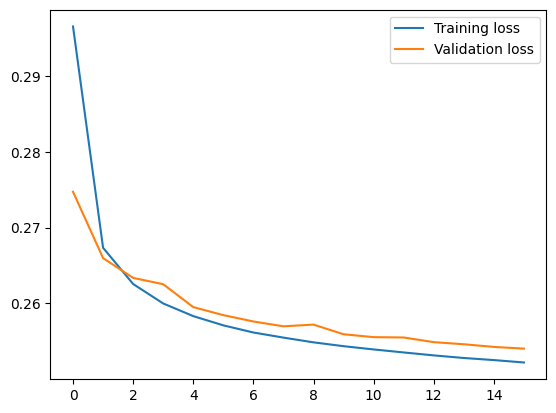

In [ ]:
# Mostramos la evolución de la función de pérdida
loss = H1.history['loss']
val_loss = H1.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss', 'Validation loss'])
plt.show()

313/313 [==============================] - 1s 2ms/step


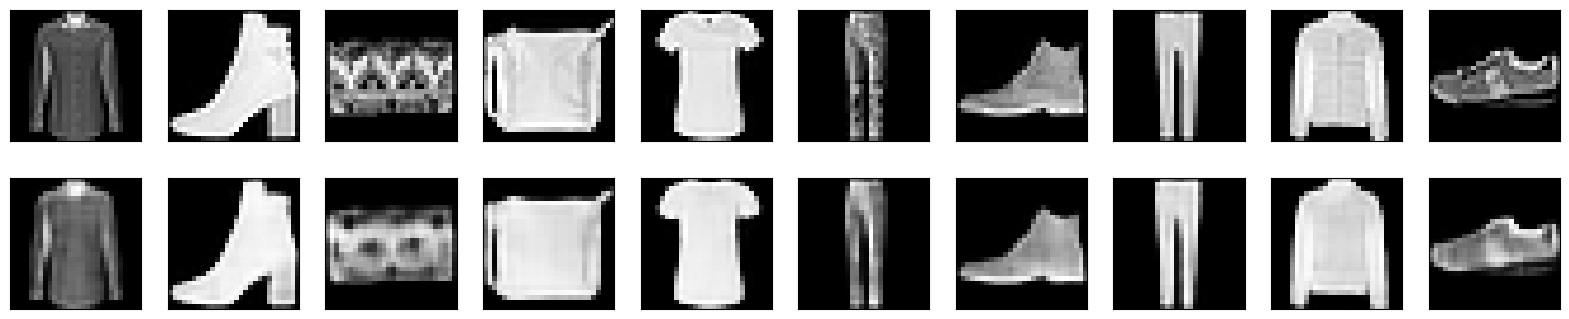

In [ ]:
# Visualizamos las imágenes originales y las reconstruidas
decoded_imgs = autoencoder.predict(test_data)

display(test_data, decoded_imgs)

Se ve como la imagen reconstruida es muy similar a la original, pero quitando detalles de la imagen original.

<font color='blue'> Ahora vamos a entrenar con las imágenes ruidosas a la entrada y las imágenes sin ruido a la salida. Nuestro propósito es crear un modelo que permita reconstruir a la salida las imágenes sin ruido. Se deben discutir los resultados obtenidos, así como si se percibe alguna diferencia entre las curvas de entrenamiento cuando se emplean imágenes con y sin ruido.

In [ ]:
# A CUBRIR POR EL ALUMNADO

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1, min_delta=0.001)


In [ ]:
H2 = autoencoder.fit(noisy_train_data, train_data,
                    epochs=50,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(noisy_test_data, test_data),
                    callbacks=[early_stopping])

Epoch 1/50
469/469 [==============================] - 8s 16ms/step - loss: 0.3242 - val_loss: 0.3073
Epoch 2/50
469/469 [==============================] - 7s 15ms/step - loss: 0.3023 - val_loss: 0.3034
Epoch 3/50
469/469 [==============================] - 8s 18ms/step - loss: 0.2979 - val_loss: 0.2983
Epoch 4/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2948 - val_loss: 0.2955
Epoch 5/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2923 - val_loss: 0.2933
Epoch 6/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2904 - val_loss: 0.2924
Epoch 7/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2891 - val_loss: 0.2906
Epoch 8/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2881 - val_loss: 0.2897
Epoch 9/50
469/469 [==============================] - 7s 15ms/step - loss: 0.2873 - val_loss: 0.2893
Epoch 10/50
469/469 [==============================] - 7s 14ms/step - loss: 0.2866 - val_lo

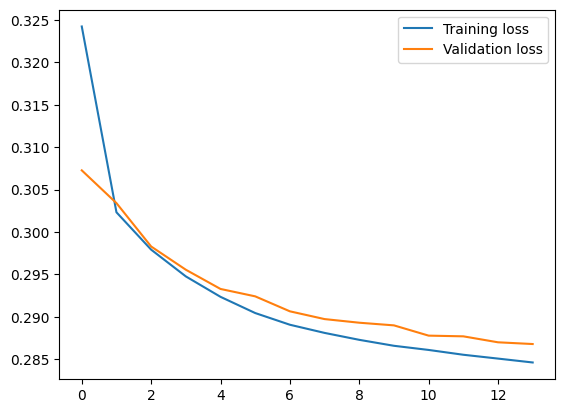

In [ ]:
# Mostramos la evolución de la función de pérdida
loss = H2.history['loss']
val_loss = H2.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss', 'Validation loss'])
plt.show()

La gráfica es similar a la anterior salvo en que el validation loss está más alejada de la de training, creo que debido al ruido de las nuevas imágenes.

313/313 [==============================] - 1s 2ms/step


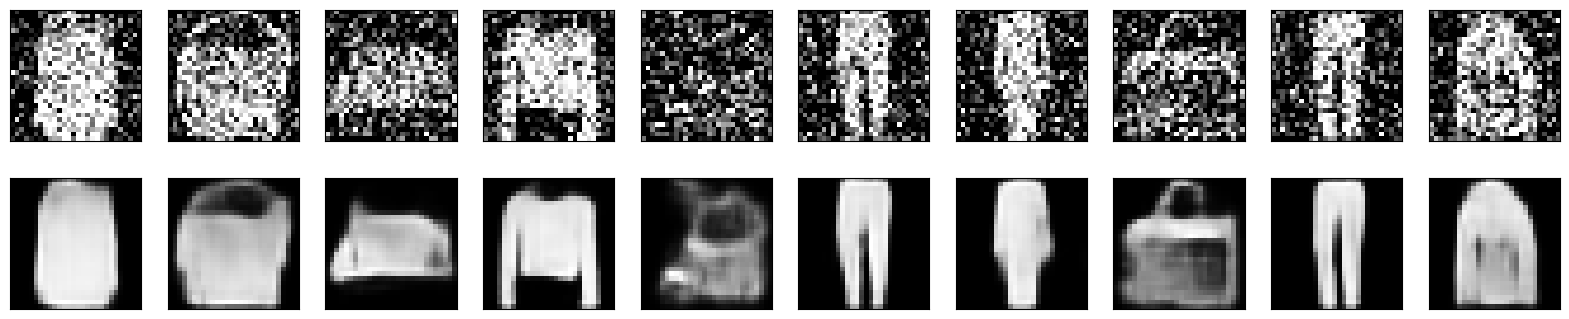

In [ ]:
# Visualizamos las imágenes originales y las reconstruidas
decoded_imgs = autoencoder.predict(noisy_test_data)

display(noisy_test_data, decoded_imgs)

Aquí se ve com el auto encoder hacer buen trabajo en reconstruir las imagenes ruidosas, haciendo que se pueda distinguir lo que hay en las imagenes.

Como desventaja las imagenes reconstruidas son algo borrosas.

<font color='blue'> Finalmente, se deben realizar dos experimentos.  

1.   Por un lado, probar con distintos `noise_factor` progresivamente más severos de ruido, para comprobar si hay algún límite (_breakpoint_) a partir del cual la reconstrucción de las imágenes ruidosas se resiente. En otras palabras, queremos estudiar hasta qué grado de ruidosidad podemos reconstruir nuestras imágenes contaminadas con ruido.
2.   Por otro lado, debemos investigar si el autoencoder entrenado generaliza y permite reconstruir imágenes en presencia de ruido diferente. Sin realizar ningún otro entrenamiento, y empleando el autoencoder ya entrenado, ¿podemos reconstruir las imágenes contaminadas con este otro tipo de ruido? Para simular dicho ruido se debe emplear la función que se proporciona más abajo (`noise2()`), aunque se da libertad al alumnado para experimentar también con otros tipos de ruido. ¿Qué conclusiones se pueden extraer de este experimento?



In [ ]:
def noise2(image, noise_factor):
    noisy_array = image.copy()
    probs = np.random.random(noisy_array.shape[:2])
    noisy_array[probs < noise_factor/2] = 0.0
    noisy_array[probs > 1 - (noise_factor/2)] = 1.0
    return np.clip(noisy_array, 0.0, 1.0)

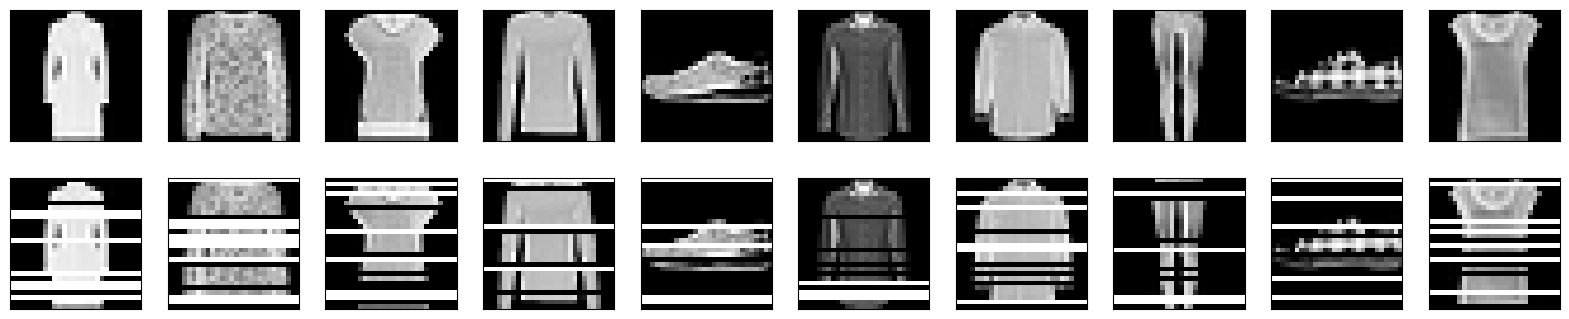

In [ ]:
noise_factor = 0.4

noisy_test_data = noise2(test_data,noise_factor)

display(test_data, noisy_test_data)

313/313 [==============================] - 1s 2ms/step


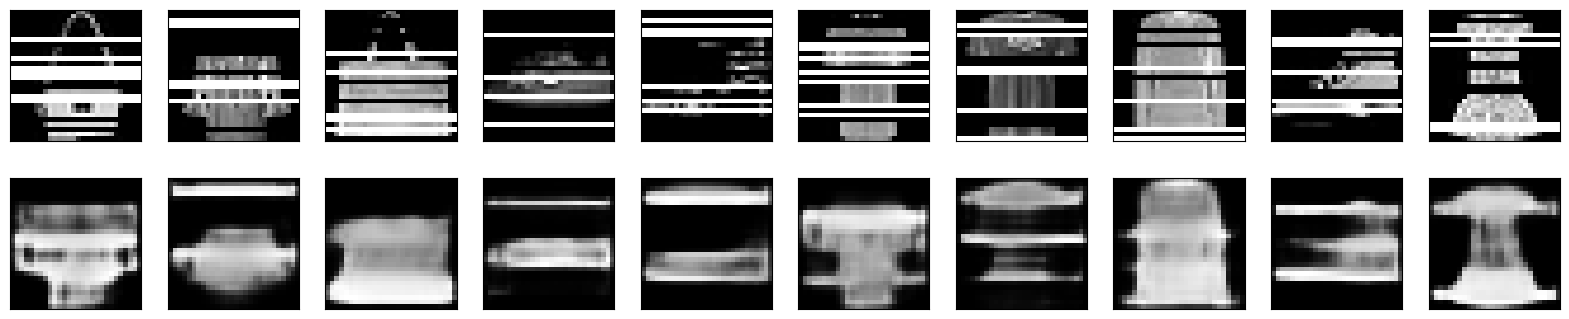

In [ ]:
# A CUBRIR POR EL ALUMNADO
decoded_imgs = autoencoder.predict(noisy_test_data)

display(noisy_test_data, decoded_imgs)

Se ve que el autoencoder no está preparado para este nuevo tipo de ruido, por lo que no reconstruye bien.

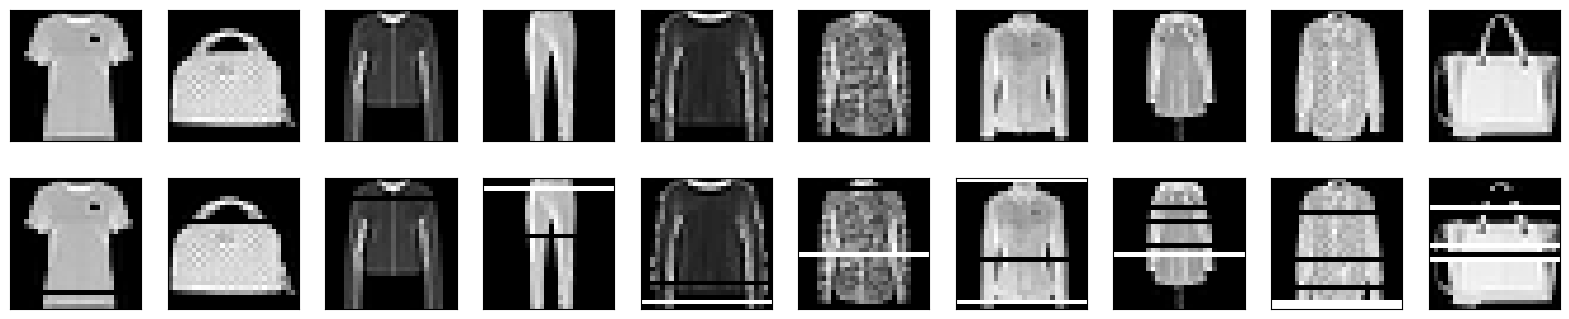

In [ ]:
noise_factor = 0.1

noisy_test_data = noise2(test_data,noise_factor)

display(test_data, noisy_test_data)

313/313 [==============================] - 1s 2ms/step


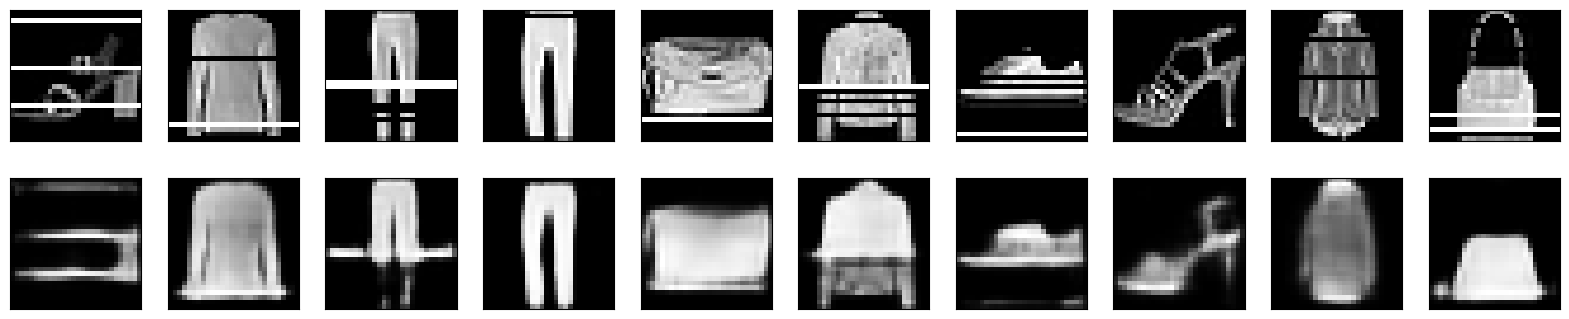

In [ ]:
decoded_imgs = autoencoder.predict(noisy_test_data)

display(noisy_test_data, decoded_imgs)

Tampoco lo hace para un nivel de ruido menor, por lo que el encoder no sirve para este ruido. Habría que reentrenarlo para que pueda hacerlo mejor.

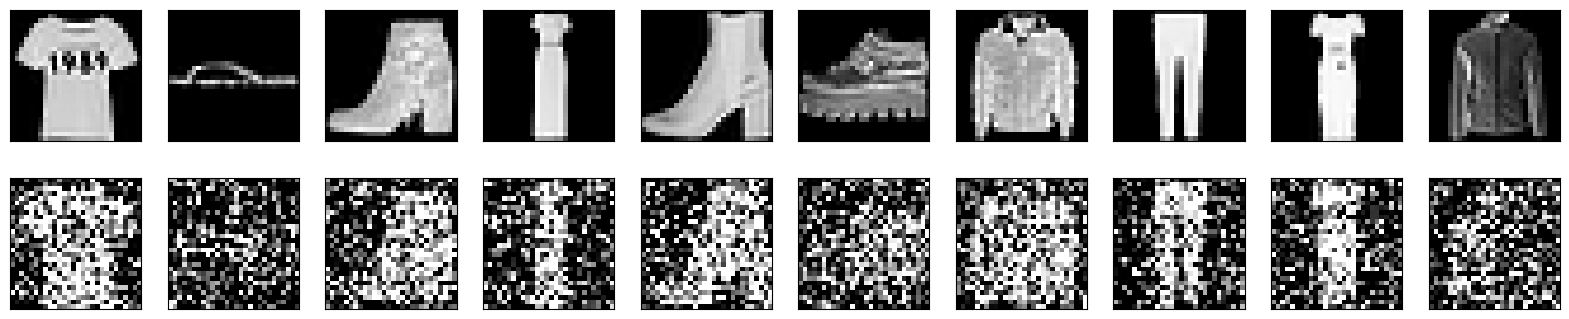

In [ ]:
noise_factor = 0.6

noisy_test_data = noise(test_data,noise_factor)

display(test_data, noisy_test_data)

313/313 [==============================] - 1s 2ms/step


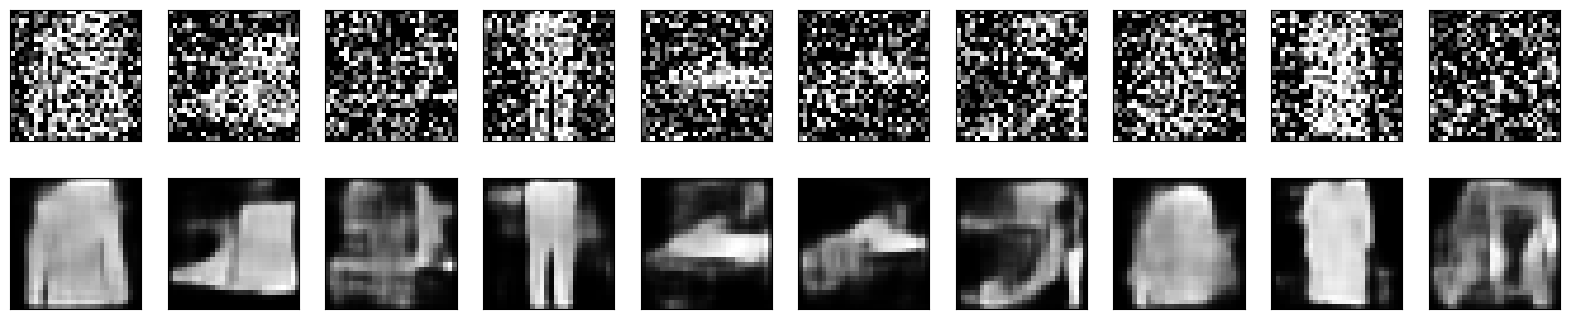

In [ ]:
decoded_imgs = autoencoder.predict(noisy_test_data)

display(noisy_test_data, decoded_imgs)

También, con mucho ruido de la función original no reconstruye muy bien.

Como conclusión, para que el autoencoder pueda generalizar mejor, debemos entrenarlo con diferentes tipos de ruido y distintos niveles de ruido.